In [1]:
import numpy as np

from data_gen_utils import NP2_gen, plot_training_data

In [2]:
# data parameters
Pois_ON = False
N_R = 200000 # size of reference sample
"""
'ref': equivalent to background only
'NP1': peak in the tail
'NP2': non-resonant signal
'NP3': peak in the bulk
'NP4': a deficit in the tail
"""
sig_type = 'NP1'

NR = 1990 # size of background sample (for reference data - calibration - should be 2000)
NS = 10 # number of signal events (for reference data - calibration - should be zero)
ND = NR + NS # size of data sample (this sum should be 2000)

N = ND + N_R # total size
weight = ND/N_R

In [8]:
seed=10
rng = np.random.default_rng(seed)

In [9]:
if Pois_ON:
    NS_p = rng.poisson(lam=NS, size=1).item()
    NR_p = rng.poisson(lam=NR, size=1).item()
    ND = NS_p + NR_p # size of data sample (this sum should be fluctuating around 2000 if isPoi==True)
    N = ND + N_R # total size
else:
    NS_p = NS
    NR_p = NR

In [10]:
### reference sample
ref = rng.exponential(scale=1, size=(N_R,1))
print(ref.shape)

(200000, 1)


In [11]:
### create dataset

### background sample
bkg = rng.exponential(scale=1, size=(NR_p,1))
print(f"Background shape: {bkg.shape}")

### reference data sample
### we generate here the signal events and combine them with the background
if sig_type=='NP1':
    sig = rng.normal(loc=6.4, scale=0.16, size=(NS_p,1))
elif sig_type=='NP2':
    sig = np.expand_dims(NP2_gen(NS_p, rng), axis=1)*8
elif sig_type=='NP3':
    sig = rng.normal(loc=1.6, scale=0.16, size=(NS_p,1))
else: 
    sig = rng.exponential(scale=1, size=(NS_p,1))

data = np.concatenate((bkg,sig), axis=0)

# apply cut if NP4 signal and update ND and N
if sig_type=='NP4':
    mask_idx = np.where((data >= 5.07))[0]
    data = np.delete(data, mask_idx, axis=0)

    ND_p = data.shape[0]
    N = ND_p + N_R

print(f"Data shape: {data.shape}")

# initialize dataset
X = np.zeros(shape=(N,1))
# fill with reference
X[:N_R,:] = ref
# fill with data
X[N_R:,:] = data
# initialize labes
Y = np.zeros(shape=(N,1), dtype=np.float64)
# fill with data labels
Y[N_R:,:] = np.ones((ND,1), dtype=np.float64)

weights = np.vstack((np.ones((N_R,1))*weight,np.ones((ND,1))))

Background shape: (1990, 1)
Data shape: (2000, 1)


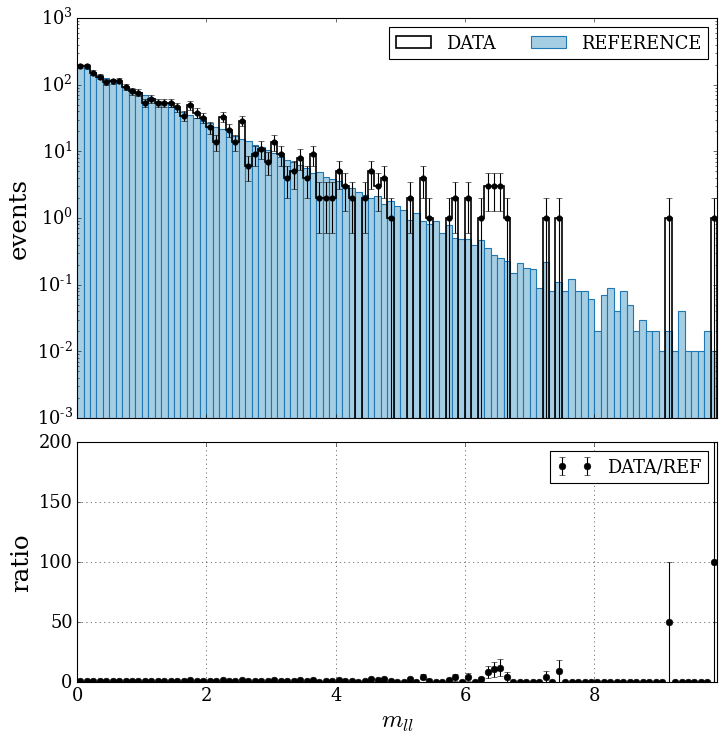

In [12]:
bins_code = {                                                                                                                                                                                                                                                                         
    'mass': np.arange(0, 10, 0.1)                                                                                                                             
    }  
ymax_code = {                                                                                                                                                                                                                                                                       
    'mass': 15                                                                                                                             
    }  
xlabel_code = {                                                                                                                                                                                                                                                                        
    'mass': r'$m_{ll}$',                                                                                                                            
    }  
feature_labels = list(bins_code.keys())


plot_training_data(data=data, weight_data=weights[Y.flatten()==1], ref=ref, weight_ref=weights[Y.flatten()==0], 
                   feature_labels=feature_labels, bins_code=bins_code, xlabel_code=xlabel_code, #ymax_code=ymax_code
                   save=False, save_path='', file_name='')
